TP2
=======

**Objectif**: utiliser Python pour caractériser un filtre

**Pré-requis**: Le cours associé est le CM3, "Transformée en Z".

**Durée:** 4h

**Instructions générales:**
    
* téléchargez le fichier notebook `.ipynb` à l'adresse [www](https://gitlab.com/hazaa/oml3/-/blob/main/book/TP2-TZ.ipynb)
* Si vous cherchez de l'**aide** sur une fonction Python/Numpy depuis Jupyter Notebook:
   *  ouvrez une cellule et taper par exemple `?np.sin`, puis validez.
   *  sinon cherchez dans sur la documentation générale [Python](https://docs.python.org/) ou [Numpy](https://numpy.org/doc/stable/reference/)
   * tout en bas du notebook, vous trouverez un aide-mémoire des fonctions numpy utiles.

In [2]:
# code à executer en début de TP
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
plt.rcParams['font.size']=20

from scipy.fft import fft, ifft, fftfreq, fftshift
from scipy.io import wavfile

## 0) Exemple d'étude de filtre

Ci-dessous on montre comment réaliser l'analyse d'un filtre **à temps discret** avec un logiciel.

Le cas particulier qui nous sert d'exemple: un **filtre à moyenne glissante**. (voir cours "CM3 TZ", exemple "Moyenne glissante")

L'**équation de récurrence** de ce filtre s'écrit:

$\begin{equation}
y_n =  \frac{1}{2} \Big( x_{n} +x_{n-1}\Big)
\end{equation}
$

* Le filtre est **non-récursif**. 
* Ses coefficients sont:
   *  $a_0=1, ~a_1=0, ~a_2=0,\ldots$
   *  $b_0=1/2, ~b_1=1/2, ~b_2=0, ~b_3=0 \ldots$
* Sa transmittance en $z$ est:
   $H(z)=\frac{1}{2} \frac{1+z^{-1}}{1}$



Avec **Python**, on dispose des outils suivants:
    
* la fonction ```lfilter(b,a,x)``` calcule la réponse à un signal ```x``` d'un filtre dont les coefficients sont les vecteurs ```b``` et ```a``` définis ci-dessus. Voir la documentation de [lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter) pour plus de détail.
* la fonction ```freqz(b,a)``` calcule la réponse fréquentielle. Voir la documentation de [freqz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html#scipy.signal.freqz) pour plus de détail. 

**Attention**: `a` et `b` ci-dessus sont les tableaux $[a_0, a_1,\ldots]$ et $[b_0, b_1,\ldots]$, où $a_0,\ldots ~b_0, \ldots$ ont été vus en cours et en TD.

**Exemples:**

* comme $a_0=1$ puis $a_1=0, ~a_2=0, \ldots$, on aura en Python: ```a=np.array([1])```
* comme $b_0=1/2$ et $b_1=1/2$, puis $b_2=0, ~b_3=0, \ldots$, , on aura en Python: ```b=np.array([1/2,1/2])```



### a) Réponse impulsionnelle

<h3> a) Réponse impulsionnelle   </h3>

Ci-dessous on va calculer la réponse $y_k$ du filtre à une impulsion de Dirac discrète $x_n=\delta[n]$, de **deux manières**: à la main et avec la fonction `lfilter`.

**Méthode 1: calcul à la main** voir cours, exemple "Moyenne glissante". 
    
On en déduit le tableau suivant:
    

|$n=$|$0$|$1$|$2$|$\ldots$|$10$|
|---|---|---|---|---|---|
|$x_n=\delta[n]$|1|0|0|$\ldots$|0|    
|$x_{n-1}=\delta[n-1]$|0|1|0|$\ldots$|0|    
|$y_n=  \frac{1}{2} \Big( x_{n} +x_{n-1}\Big)$|$\frac{1}{2}$|$\frac{1}{2}$|$0$|$\ldots$|$0$|    
    
Puis on trace:

/tmp/ipykernel_9285/415544322.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax[0].stem(n,xn,use_line_collection=True, basefmt='C0-')
/tmp/ipykernel_9285/415544322.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax[1].stem(k,yk,use_line_collection=True, basefmt='C0-')


(0.0, 1.0)

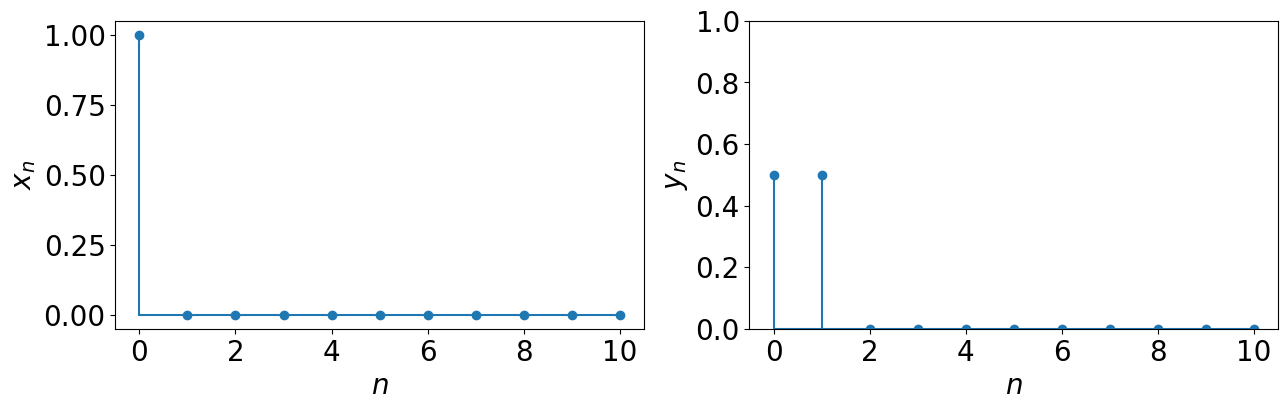

In [21]:
n = [0,1,2,3,4,5,6,7,8,9,10]
xn=[1,0,0,0,0,0,0,0,0,0,0]        # Impulsion de Dirac en temps discret
yn = [1/2,1/2,0,0,0,0,0,0,0,0,0]

# affichage
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].stem(n,xn,use_line_collection=True, basefmt='C0-')
ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$x_n$')
ax[1].stem(n,yn,use_line_collection=True, basefmt='C0-')
ax[1].set_xlabel(r'$n$')
ax[1].set_ylabel(r'$y_n$')
ax[1].set_ylim([0,1])

**Méthode 2: avec Python/Scipy** et la fonction `lfilter`:

/tmp/ipykernel_9285/4139880475.py:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax[0].stem(x,use_line_collection=True, basefmt='C0-')
/tmp/ipykernel_9285/4139880475.py:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax[1].stem(y,use_line_collection=True, basefmt='C0-')


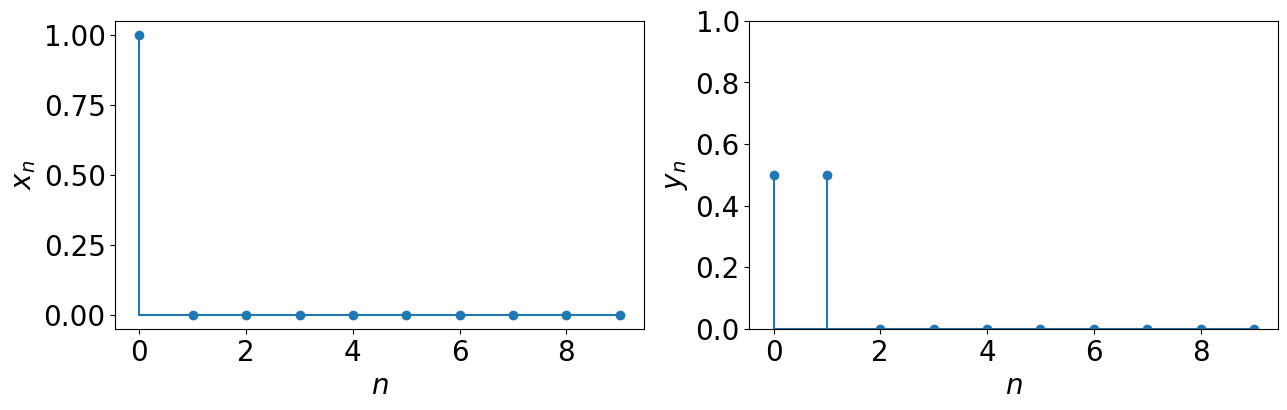

In [22]:
# FILTRAGE: moyenne mobile

# paramètres du filtre (voir ci-dessus)
a = np.array([1.0])
m = 2
b = 1/m*np.ones(m)

# input= Dirac
x = np.zeros(10); 
x[0]=1

# calcul de la sortie
y=signal.lfilter(b, a, x)

# affichage
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].stem(x,use_line_collection=True, basefmt='C0-')
ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$x_n$')
ax[1].stem(y,use_line_collection=True, basefmt='C0-')
ax[1].set_ylabel(r'$y_n$')
ax[1].set_xlabel(r'$n$')
ax[1].set_ylim([0,1])
plt.subplots_adjust(hspace=0.8)


**Commentaire**: 

on retrouve bien le même diagramme pour $y_n=f(n)$

    
    
    
    

### b) Réponse indicielle

<h3> b) Réponse indicielle </h3>

**Méthode 1: calcul à la main** comme ci-dessus.

**Méthode 2: avec Python/Scipy** et la fonction `lfilter`:

/tmp/ipykernel_9285/86529640.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax[0].stem(x,use_line_collection=True, basefmt='C0-')
/tmp/ipykernel_9285/86529640.py:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax[1].stem(y,use_line_collection=True, basefmt='C0-')


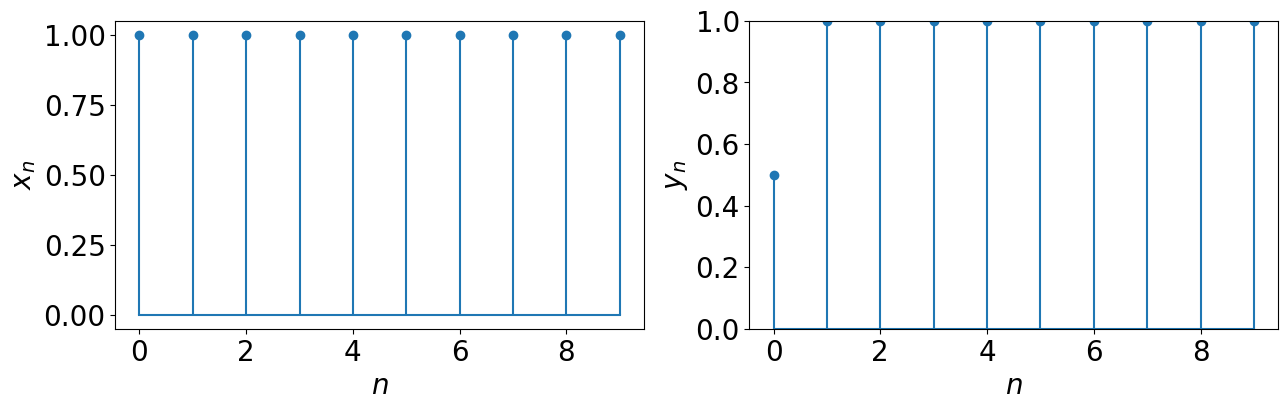

In [23]:
# paramètres du filtre
a = np.array([1.0])
m = 2
b = 1/m*np.ones(m)

# input= échelon
x = np.ones(10)

# calcul de la sortie
y=signal.lfilter(b, a, x)

# affichage
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].stem(x,use_line_collection=True, basefmt='C0-')
ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$x_n$')
ax[1].stem(y,use_line_collection=True, basefmt='C0-')
ax[1].set_ylabel(r'$y_n$')
ax[1].set_xlabel(r'$n$')
ax[1].set_ylim([0,1])
plt.subplots_adjust(hspace=0.8)

### c) Réponse fréquentielle
<h3> c) Réponse fréquentielle  </h3>

**Méthode 1: calcul à la main** 

On commence par calculer à la main $\omega \rightarrow \vert H(e^{j\omega})\vert$ 

* Module: on a déjà vu (cf DS blanc) que pour $y_n=x_n+x_{n-1}$, on avait $\vert H(e^{j\omega})\vert=2\cos(\frac{\omega}{2})$. On en déduit que pour $y_n=\frac{1}{2}(x_n+x_{n-1})$, on a $\vert H(e^{j\omega})\vert=\cos(\frac{\omega}{2})$.
* Argument: il est possible de montrer que  $\phi$, l'argument de $\vert H(e^{j\omega})$, vaut $\phi=-\frac{\omega}{2}$. (cf Oppenheimer97 p.235)


On trace:

(-40.0, 1.0)

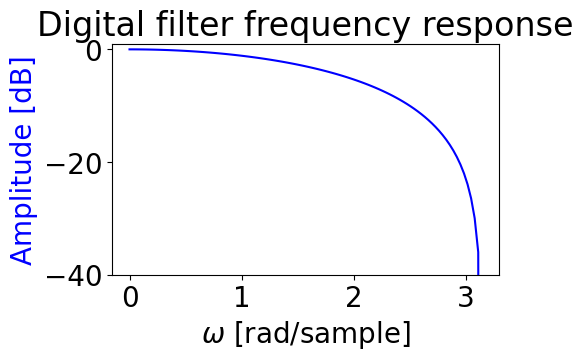

In [10]:
#calcul
omega = np.linspace(0,np.pi,100)
h=np.cos(omega/2)

#affichage
fig, ax1 = plt.subplots(figsize=(5,3))
ax1.set_title('Digital filter frequency response')
ax1.plot(omega, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('$\omega$ [rad/sample]')
ax1.set_ylim([-40,1])




**Méthode 2: avec Python/Scipy** réponse dans le domaine fréquentiel avec ```freqz```

Text(0.5, 0, '$\\omega$ [rad/sample]')

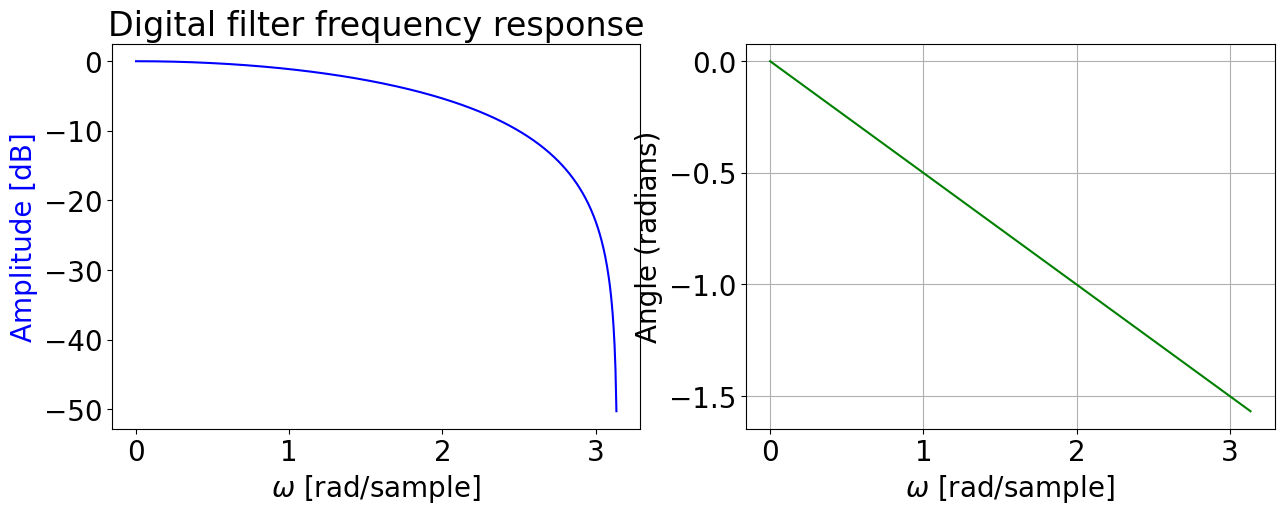

In [3]:
# paramètres du filtre
a = np.array([1.0])
m = 2
b = 1/m*np.ones(m)

# réponse frequentielle
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html#scipy.signal.freqz
w, h = signal.freqz(b,a)
angles = np.unwrap(np.angle(h))

# affichage
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Digital filter frequency response')
ax[0].plot(w, 20 * np.log10(abs(h)), 'b')
ax[0].set_ylabel('Amplitude [dB]', color='b')
ax[0].set_xlabel('$\omega$ [rad/sample]')

ax[1].plot(w, angles, 'g')
ax[1].set_ylabel('Angle (radians)')
ax[1].grid(True)
ax[1].axis('tight')
ax[1].set_xlabel('$\omega$ [rad/sample]')

**Commentaire**:

on retrouve bien le même résultat.

## 1)  Exercice 

**QUESTION 1.1:**  Répéter toutes les étapes (à la main/avec Python) données dans l'exemple introductif pour les filtres ci-dessous:

*  filtre dérivateur: $y_n =  x_n - x_{n-1}$



**QUESTION 1.2:**  Répéter toutes les étapes (à la main/avec Python) données dans l'exemple introductif pour les filtres ci-dessous:

*  filtre de lissage: $y_n =  x_n + 2 x_{n-1} + x_{n-2}$




## 2) Filtrage d'un signal réel

On va maintenant travailler sur signaux réels inconnus, échantillonnés à $f_s=16~kHz$ pendant $1 ~s$, comme dans le TP1.

* Téléchargez le fichier `vi-1483315200_234072_trim.wav` à l'adresse: [www](https://gitlab.com/hazaa/oml3/-/tree/main/book/data)
* Executez le code ci-dessous qui va charger les données.
* les données contiennent les mesures de deux canaux d'acquisition distincts. Elles sont donc stockées dans un tableau de dimension 2. Pour accéder à l'un ou l'autre canal, il faut choisir `x[:,0]` ou `x[:,1]`.

Ce signal est bruité et on veut le débruiter.

number of channels = 2
length = 1.0s


(0.0, 0.08)

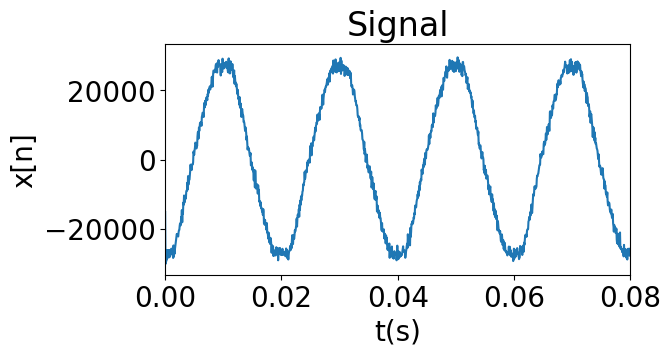

In [27]:
# lecture du signal
wav_fname = 'data/vi-1483315200_234072_trim.wav'  # A MODIFIER !!!!
samplerate, data = wavfile.read(wav_fname)
length = data.shape[0] / samplerate

print(f"number of channels = {data.shape[1]}")
print(f"length = {length}s")

n=data.shape[0]                           # la taille du tableau
time = np.linspace(0., length, n)         # la base de temps
xn = data[0:n, 0]+1000*np.random.randn(n)

# tracé du graphe dans le domaine temporel
fig,ax = plt.subplots(1,1, figsize=(6,3))     # 1 graphe. 1 ligne, 1 colonne
ax.plot(time,xn)                                   
ax.set_title( "Signal")
ax.set_xlabel('t(s)')
ax.set_ylabel('x[n]')
ax.set_xlim([0,0.08])

**QUESTION 2.1** 
* Filtrer le signal avec un filtre récursif passe-bas $a=[1.0, -0.6], ~b=[0.4]$. 
* Afficher la sortie $y_n$ du filtre **dans le domaine temporel**, en superposition avec l'entrée $x_n$, en vous aidant du code ci-dessous.
* A-t-on bien débruité le signal en entrée ? (on pourra zoomer pour vérifier si $y_n$ est plus "lisse" ou pas)

(cf cours, Exemple associé à "Transformation d’Euler ou équivalence de la dérivation")

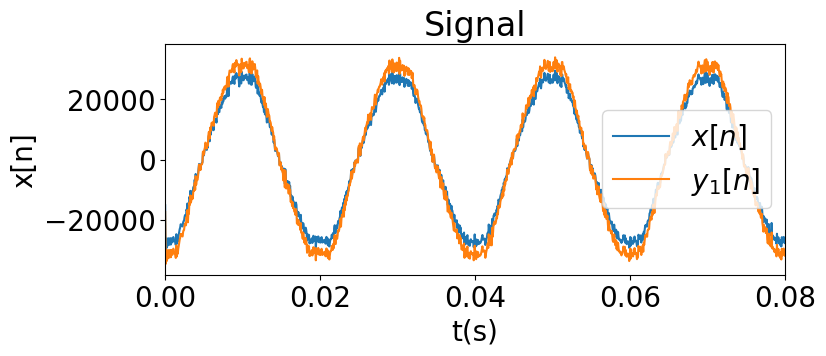

In [28]:
fig,ax = plt.subplots(1,1, figsize=(8,3)) 

ax.plot(time,xn, label=r'$x[n]$') 
ax.set_title( "Signal")
ax.set_xlabel('t(s)')
ax.set_ylabel('x[n]')
ax.plot(time,xn*1.15, label=r'$y_1[n]$' )  # A MODIFIER!!
ax.set_xlim([0,0.08])
ax.legend(loc='right')

**QUESTION 2.2** 
* Filtrer le signal avec un autre filtre passe-bas donné par le code ci-dessous.
* Afficher ce signal filtré $y_2[n]$ **dans le domaine temporel**, en superposition avec $x[n]$.
* A-t-on bien débruité le signal en entrée ?


In [ ]:
# Filtre 2
fcut = 0.01 
b = signal.firwin(40, fcut) 
a =1

**QUESTION 2.3** Comparer les avantages et inconvénients des deux filtres et remplir le tableau ci-dessous.

||Filtre 1 ($y_1[n]$)|Filtre 2 ($y_2[n]$)|
|---|---|---|
|Avantages|| |
|Inconvénients|| |

**QUESTION 2.4** pour comprendre les différences constatées ci-dessus, on tracer la réponse en fréquence pour chacun des 2 filtres. Vous pourrez vous aider du code vu plus haut, et du code ci-dessous pour l'affichage.

In [ ]:
# calcul des réponses en fréquence des 2 filtres
w1=[0,1] # A MODIFIER !!!
w2=[0,1] # A MODIFIER !!!


# affichage
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Digital filter frequency response')
ax[0].plot(w1, w1, label='filtre 1')             # A MODIFIER !!!
ax[0].plot(w2, w2, label='filtre 2')             # A MODIFIER !!!
ax[0].set_ylabel('Amplitude [dB]', color='b')
ax[0].set_xlabel('$\omega$ [rad/sample]')
ax[0].legend(loc='right')

ax[1].plot(w1, w1, label='filtre 1')                # A MODIFIER !!!  
ax[1].plot(w2, w2, label='filtre 2')                # A MODIFIER !!!  
ax[1].set_ylabel('Angle (radians)')
ax[1].grid(True)
ax[1].axis('tight')
ax[1].set_xlabel('$\omega$ [rad/sample]')
ax[1].legend(loc='right')

**QUESTION 2.5** vérifions l'effet du filtre **dans le domaine fréquentiel**.
* Pour les 3 signaux $x[n],~y_1[n], ~y_2[n]$, on calcule les coefficients de la SFD (cf TP1). Mais comme il y a du bruit, on ne peut pas utiliser `fft()` comme dans le TP1. On doit utiliser une fonction spéciale qui permet de filtrer le bruit de mesure: `periodogram()`. Vous pourrez vous aider du code ci-dessous.
* Quel est l'effet du filtrage **dans le domaine fréquentiel** ?
* Est-ce cohérent avec les réponses fréquentielles vues ci-dessus ? Pourquoi ?

In [ ]:
fs=1e3           # fréquence d'échantillonnage. A MODIFIER  !!!

f, P_xn = signal.periodogram(xn, fs, 'flattop', scaling='spectrum')    
f, P_yn1 = signal.periodogram(xn, fs, 'flattop', scaling='spectrum')  # A MODIFIER  !!!  
f, P_yn2 = signal.periodogram(xn, fs, 'flattop', scaling='spectrum')  # A MODIFIER  !!! 

plt.semilogy(f, P_xn, label='xn')
plt.semilogy(f, P_yn1, label='yn1')
plt.semilogy(f, P_yn2, label='yn2')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
#plt.xlim([0,1000])     # pour zoomer en cas de besoin
plt.legend(loc='right')
plt.show()


Annexe
--------------

**Résumé des fonctions Python/Numpy/Scipy**

| |Fonction | Exemple |
|--- | ---|--- |
|vecteur composé de 1|`np.ones(n)` |`x=np.ones(10)`|
|vecteur composé de 0 |`np.zeros(n)`|`y=np.zeros(20)`|
|initialisation d'un vecteur numpy|`np.array(x)`|`x=np.array([1,2,3])`|
|réponse temporelle | ```lfilter``` | `y=signal.lfilter(b, a, x)` |
|réponse fréquentielle | ```freqz``` | `w, h = signal.freqz(b,a)`|
| bruit gaussien | `np.random.randn`| `e=np.random.randn( 1 )` |
| bruit uniforme | `np.random.rand`| `e=np.random.rand( 1 )` |
|trace fonction à temps discret| `stem` | `fig,ax = plt.subplots(); ax[0].stem(x)`|

### Références

<h3> Références  </h3>

    
* poly Bercher §11 "digital filters"    
* matlab:
    *  many DSP examples https://fr.mathworks.com/help/signal/examples.html?category=getting-started-with-signal-processing-toolbox&s_tid=CRUX_topnav
    *  https://fr.mathworks.com/help/signal/ug/practical-introduction-to-digital-filtering.html
    *  https://fr.mathworks.com/help/signal/ug/practical-introduction-to-digital-filter-design.html    

### Notes pour le prof

<h3> Notes pour le prof   </h3>

* impulse response: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dimpulse.html#scipy.signal.dimpulse
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dstep.html#scipy.signal.dstep
* bode: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dbode.html#scipy.signal.dbode

* phase: example see Oppenheimer97 p.235

dirac etc: bercher p.20

convol: bercher p.57 ; compare with np.convolve

filtering: bercher p.18

1er des 3 exos cottet chap 9: 

comparer :

* réponse théorique à la main (discrète)  et continu (laplace) déja calculé en TD5. 
* réponse numériq (avec  python numpy/scipy  lfilt) 


morain-nicolier, livre gargour
* réponse fréquentielle: gargour p.177


cottet: exos 2 et 3 du chap 9: 

comparer :

* réponse théorique à la main (discrète)  et continu (laplace) déja calculé en TD5. 
* réponse numériq (avec  python numpy/scipy  lfilt) 


Exercice: tracer la réponse à plusieurs sinusoïdes dans le domaine temporel, relever l'amplitude dans un tableau

Exercice: retrouver l'expression du passe bas à partir de la version continue; tracer les caractéristiques sur un plot

